In [1]:
!pip install ntscraper


In [2]:
import tweepy
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [3]:
from ntscraper import Nitter


In [4]:
scraper = Nitter(log_level = 1,skip_instance_check = False)


Testing instances: 100%|██████████| 77/77 [01:17<00:00,  1.00s/it]


In [16]:
tweets = scraper.get_tweets("car",mode = "user",number = 100)


INFO:root:No instance specified, using random instance https://nitter.privacydev.net
INFO:root:Current stats for car: 21 tweets, 0 threads...
INFO:root:Current stats for car: 41 tweets, 0 threads...


In [6]:
from pprint import pprint
pprint(tweets)

{'threads': [], 'tweets': []}


In [7]:
tweets.keys()


dict_keys(['tweets', 'threads'])

In [8]:
tweets['tweets']

[]

In [9]:
tweets['tweets']

[]

In [17]:
data ={
'link':[],
'text':[],
'user':[],
'likes':[],
'quotes':[],
'retweets':[],
'comments':[]
}
for tweet in tweets['tweets']:
    data['link'].append(tweet['link'])
    data['text'].append(tweet['text'])
    data['user'].append(tweet['user'])
    data['likes'].append(tweet['stats']['likes'])
    data['quotes'].append(tweet['stats']['quotes'])
    data['retweets'].append(tweet['stats']['retweets'])
    data['comments'].append(tweet['stats']['comments'])
import pandas as pd
df =pd.DataFrame(data)
df.head()


,link,text,user,likes,quotes,retweets,comments
0,https://twitter.com/car/status/126363876912894...,🚗 Free Tools Available 🚗 Looking to sell your...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",31,2,3,31
1,https://twitter.com/Motorscribe/status/1372506...,"In spite of EV grant cut, lots of people looki...","{'name': 'Mark Smyth', 'username': '@Motorscri...",20,0,2,5
2,https://twitter.com/car/status/134472932341731...,Happy New Year! 2021 - Share the journey with ...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",10,0,2,2
3,https://twitter.com/car/status/132440499146190...,The new Corsa E marks a big step forward as el...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",20,0,6,3
4,https://twitter.com/car/status/132332478563239...,Electric doesn't always mean expensive! With...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",12,0,2,1


In [11]:
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\S]+','',text)
    text=re.sub(r'https?:\/\/\S+','',text)
    return text
df['text']= df['text'].apply(cleanTxt)
df

,link,text,user,likes,quotes,retweets,comments


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['link']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'link'}, axis=1)
              .sort_values('link', ascending=True))
  xs = counted['link']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('link', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('link')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['text']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'text'}, axis=1)
              .sort_values('text', ascending=True))
  xs = counted['text']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('text', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('text')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['user']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'user'}, axis=1)
              .sort_values('user', ascending=True))
  xs = counted['user']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('user', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('user')
_ = plt.ylabel('count()')

In [18]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity
df['Subjectivity'] = df['text'].apply(getSubjectivity)
df['Polarity'] = df['text'].apply(getPolarity)
df

,link,text,user,likes,quotes,retweets,comments,Subjectivity,Polarity
0,https://twitter.com/car/status/126363876912894...,🚗 Free Tools Available 🚗 Looking to sell your...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",31,2,3,31,0.539286,0.200000
1,https://twitter.com/Motorscribe/status/1372506...,"In spite of EV grant cut, lots of people looki...","{'name': 'Mark Smyth', 'username': '@Motorscri...",20,0,2,5,0.508333,0.237500
2,https://twitter.com/car/status/134472932341731...,Happy New Year! 2021 - Share the journey with ...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",10,0,2,2,0.727273,0.485227
3,https://twitter.com/car/status/132440499146190...,The new Corsa E marks a big step forward as el...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",20,0,6,3,0.409091,0.272727
4,https://twitter.com/car/status/132332478563239...,Electric doesn't always mean expensive! With...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",12,0,2,1,0.807008,0.249811
5,https://twitter.com/car/status/131931770354756...,Behold the Hummer EV! Marking a new era for ...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",17,0,3,0,0.784848,0.512121
6,https://twitter.com/car/status/131859944810526...,It's here! BMWs announced it's all-electric iX...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",8,1,2,1,0.440476,0.139286
7,https://twitter.com/car/status/130265740215678...,Proof that Audis RSQ8 can play both parts! Cla...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",7,0,4,0,0.783333,0.050000
8,https://twitter.com/car/status/130227918166600...,We know what you're thinking... surely this is...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",8,0,3,0,0.768687,0.374091
9,https://twitter.com/car/status/130191961480124...,Mercedes flagship luxury Saloon has just becom...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",5,1,6,0,0.485195,0.270130


<function matplotlib.pyplot.show(close=None, block=None)>

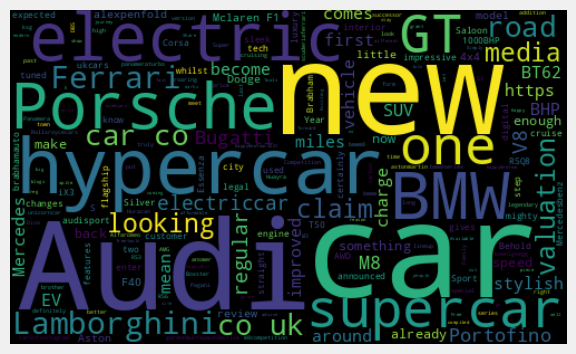

In [19]:
# Word Cloud Plotting ,
allWords =' '.join([twts for twts in df['text']])
wordCloud = WordCloud(width =500, height=300, random_state=21, max_font_size=119).generate(allWords)
plt.imshow(wordCloud, interpolation ="bilinear")
plt.axis('off')
plt.show

In [20]:
#Create function to compute negate , neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] =df['Polarity'].apply(getAnalysis)
#Show dataframe
df

,link,text,user,likes,quotes,retweets,comments,Subjectivity,Polarity,Analysis
0,https://twitter.com/car/status/126363876912894...,🚗 Free Tools Available 🚗 Looking to sell your...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",31,2,3,31,0.539286,0.200000,Positive
1,https://twitter.com/Motorscribe/status/1372506...,"In spite of EV grant cut, lots of people looki...","{'name': 'Mark Smyth', 'username': '@Motorscri...",20,0,2,5,0.508333,0.237500,Positive
2,https://twitter.com/car/status/134472932341731...,Happy New Year! 2021 - Share the journey with ...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",10,0,2,2,0.727273,0.485227,Positive
3,https://twitter.com/car/status/132440499146190...,The new Corsa E marks a big step forward as el...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",20,0,6,3,0.409091,0.272727,Positive
4,https://twitter.com/car/status/132332478563239...,Electric doesn't always mean expensive! With...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",12,0,2,1,0.807008,0.249811,Positive
5,https://twitter.com/car/status/131931770354756...,Behold the Hummer EV! Marking a new era for ...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",17,0,3,0,0.784848,0.512121,Positive
6,https://twitter.com/car/status/131859944810526...,It's here! BMWs announced it's all-electric iX...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",8,1,2,1,0.440476,0.139286,Positive
7,https://twitter.com/car/status/130265740215678...,Proof that Audis RSQ8 can play both parts! Cla...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",7,0,4,0,0.783333,0.050000,Positive
8,https://twitter.com/car/status/130227918166600...,We know what you're thinking... surely this is...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",8,0,3,0,0.768687,0.374091,Positive
9,https://twitter.com/car/status/130191961480124...,Mercedes flagship luxury Saloon has just becom...,"{'name': 'Car.co.uk', 'username': '@car', 'pro...",5,1,6,0,0.485195,0.270130,Positive


In [21]:
#Print all positive tweets
j=1
sortedDF= df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i]=='Positive'):
    print(str(i)+')' +sortedDF['text'][i])
  print()
j=j+1


0)🚗 Free Tools Available 🚗  Looking to sell your used car? After a valuation on any vehicle? Simply enter any reg...  Let our valuation engine show you different prices you are looking for - https://www.car.co.uk/car-valuation #usedcars #cars #freetools #vehicles #valuation

1)In spite of EV grant cut, lots of people looking to go electric in 2021. For my first piece for Car.co.uk I've compiled a guide to what's expected. Exciting changes coming to the site, so stay tuned for more news, reviews and advice. https://www.car.co.uk/media/blogs/electric-cars/electric-vehicles-fast-charge-into-2021 @car

2)Happy New Year! 2021 - Share the journey with us. car.co.uk #2021 #HappyNewYear #HappyNewYear2021 #Happy2021

3)The new Corsa E marks a big step forward as electric cars become more affordable. The modern and stylish city car gives you a reason to smile whilst on the way for the weekly shop 😜😃| 📸 @vauxhall #electriccorsa #electricvauxhall #corsa

4)Electric doesn't always mean expensive!  

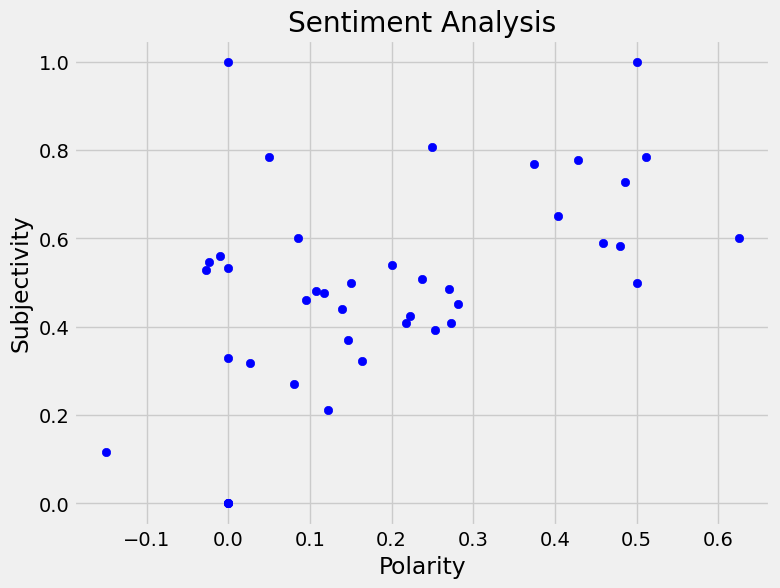

In [22]:
# Plot Polarity and Subjectivity
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()